In [132]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [133]:
df=pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [134]:
X=df.iloc[:,3:13]
y=df.iloc[:,13]


In [135]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [136]:
Y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [137]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

In [141]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [138]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [139]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [143]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

## ANN using Keras

In [154]:
import keras
from keras.models import Sequential
from keras.layers import Dense, LeakyReLU, PReLU, ELU, Dropout
# Dense-to create hidden layers

In [156]:
#Initialising ANN- creates empty NN
classifier=Sequential()

In [162]:
#Adding input layer and first hidden layer
#output_dim=number of neurons in this hidden layer, input_dim- no of input features
classifier.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu',input_dim=11))

C:\Users\anush\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [164]:
#Adding second hidden layer
classifier.add(Dense(units=6,kernel_initializer='he_normal',activation='relu'))

In [166]:
#Adding third hidden layer
classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))

In [170]:
# compiling ANN
classifier.compile(optimizer='Adamax',loss='binary_crossentropy',metrics=['accuracy'])

In [176]:
# fitting ANN to training set
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10, epochs=100)

Epoch 1/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6420 - loss: 0.6916 - val_accuracy: 0.7539 - val_loss: 0.5606
Epoch 2/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7653 - loss: 0.5522 - val_accuracy: 0.7974 - val_loss: 0.5197
Epoch 3/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7980 - loss: 0.5148 - val_accuracy: 0.8027 - val_loss: 0.4999
Epoch 4/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8030 - loss: 0.4955 - val_accuracy: 0.8012 - val_loss: 0.4861
Epoch 5/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8026 - loss: 0.4875 - val_accuracy: 0.8023 - val_loss: 0.4760
Epoch 6/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8045 - loss: 0.4736 - val_accuracy: 0.8039 - val_loss: 0.4684
Epoch 7/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8095 - loss: 0.4599 - val_accuracy: 0.8061 - val_loss: 0.4625
Epoch 8/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8081 - loss: 0.4515 - val_accu

In [178]:
print(model_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


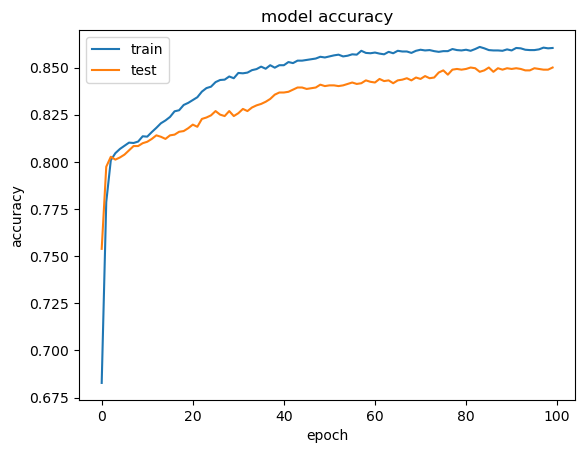

In [184]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

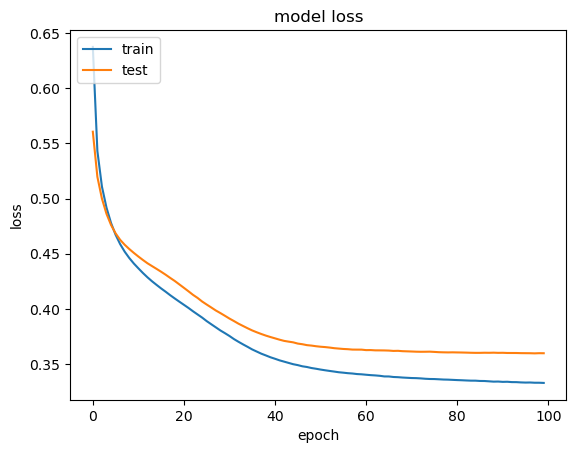

In [186]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
### making predictions and evaluating model-

In [188]:
# test results-
y_pred=classifier.predict(X_test)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [190]:
y_pred

array([[0.22766198],
       [0.33298963],
       [0.12980166],
       ...,
       [0.20059739],
       [0.15499036],
       [0.26984477]], dtype=float32)

In [192]:
y_pred = (y_pred > 0.5)


In [194]:
# making confusion matrix-
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [197]:
cm

array([[1511,   84],
       [ 199,  206]], dtype=int64)

In [199]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [201]:
score

0.8585